# Importing Libraries

In [1]:
import pandas as pd

## Loading dataset 

In [2]:
df = pd.read_csv("winequality.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Drawing scatter plot of each features vs quality

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Taking names of columns from the df
l1 = df.columns
l2 = list(l1)
features = l2[:11]
print(features)

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


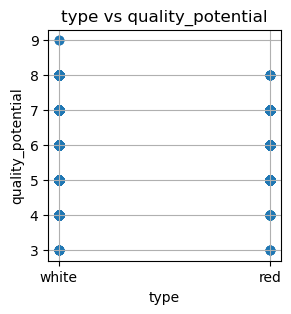

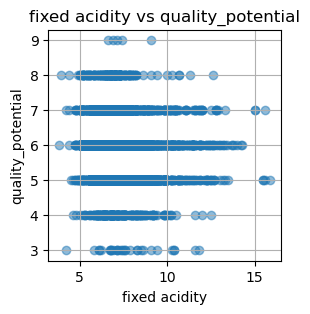

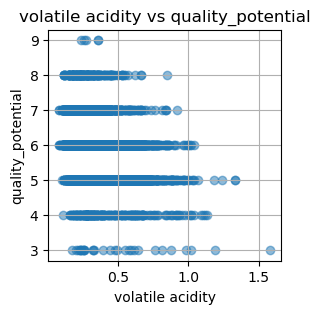

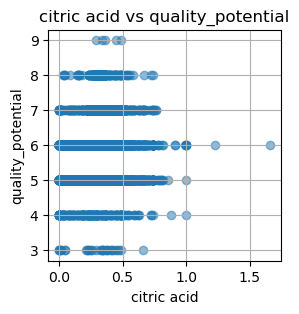

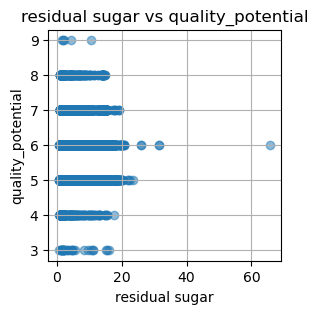

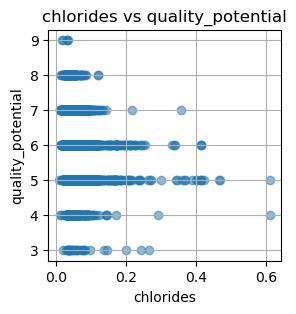

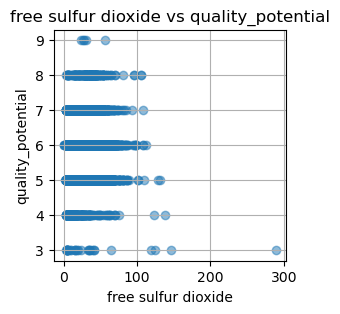

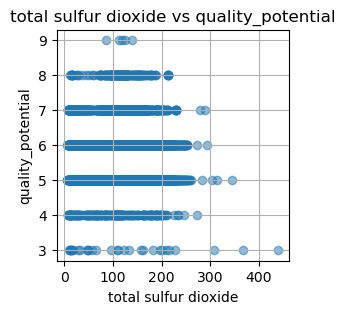

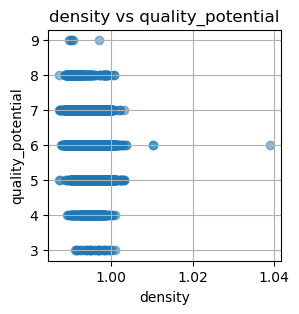

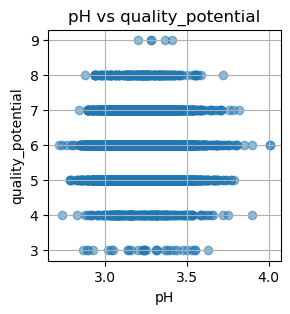

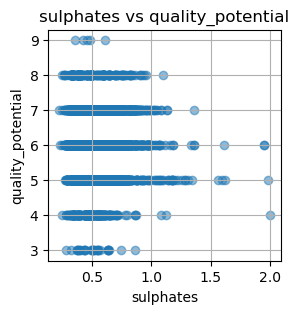

In [8]:
quality_potential = 'quality'

for feature in features:
    plt.figure(figsize=(3, 3))
    plt.scatter(df[feature], df[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()
    
    

In [19]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
df['type'] =le1.fit_transform(df['type'])

## Looking for correlation 

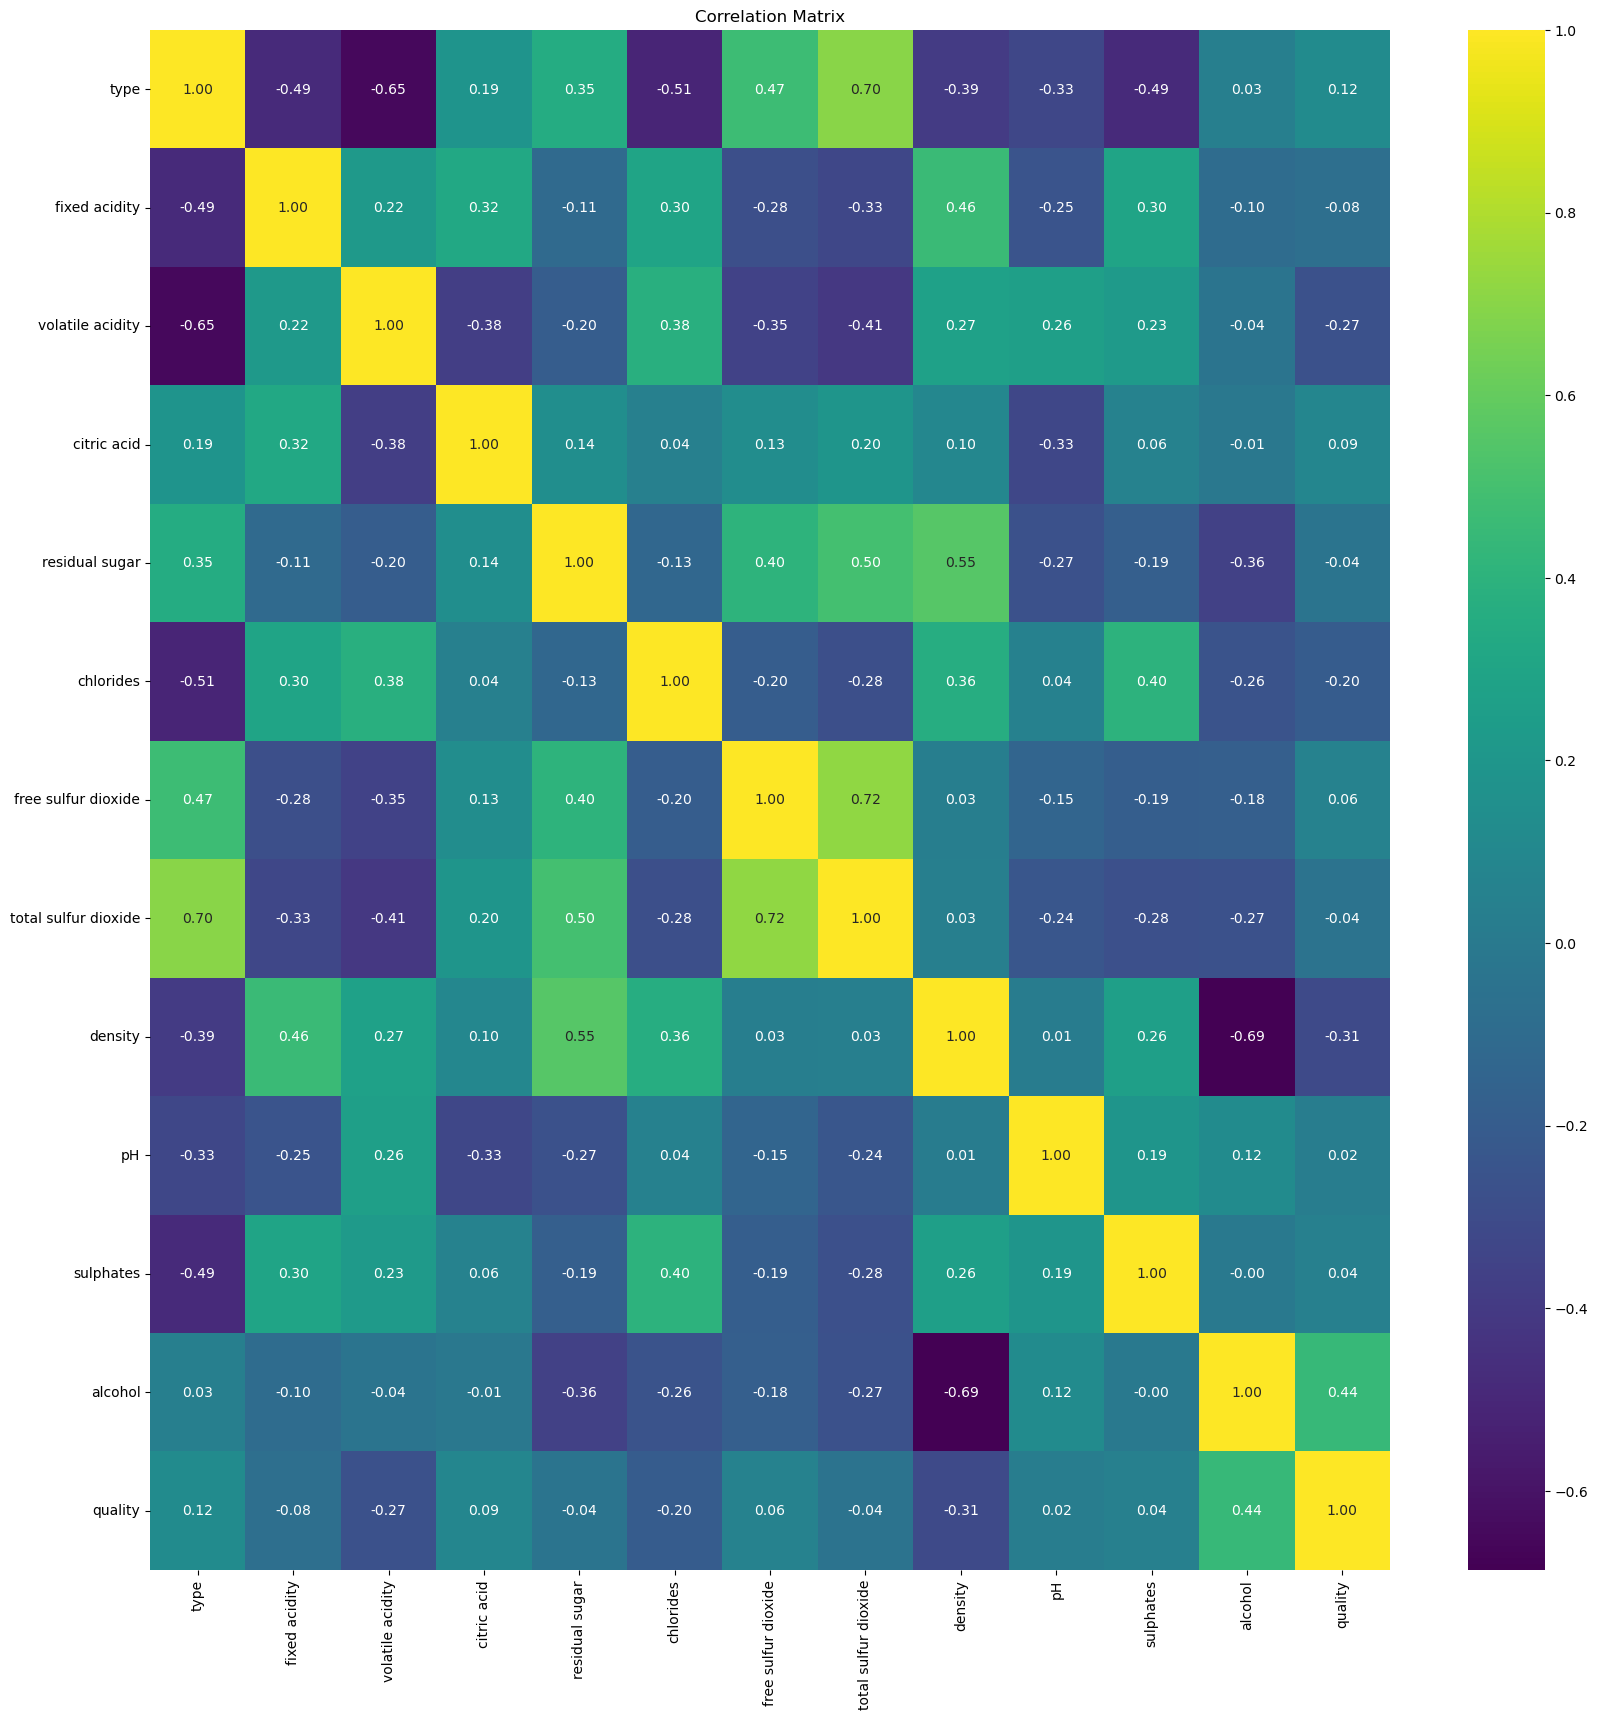

In [20]:
import seaborn as sns

corr_mat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## Box plot

In [22]:
def display_boxplot(df):
    for column in df.columns:
        plt.figure()
        plt.boxplot(df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

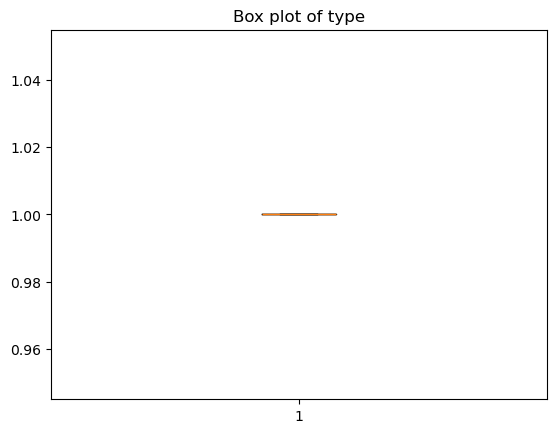

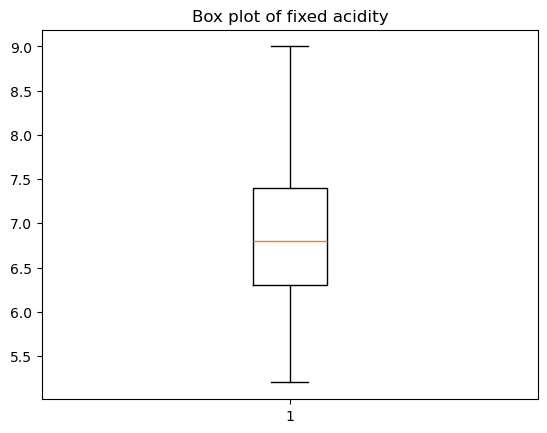

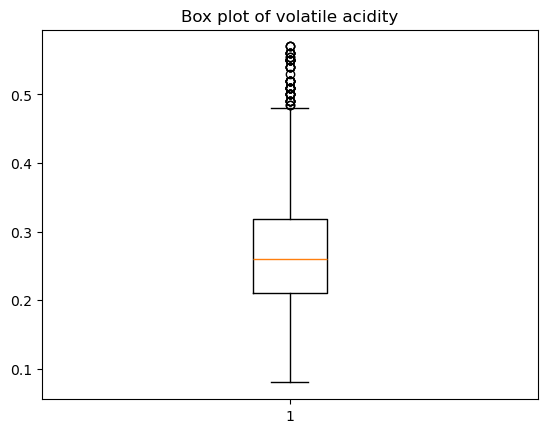

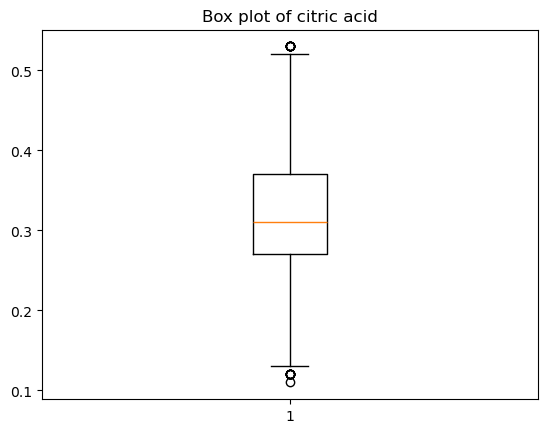

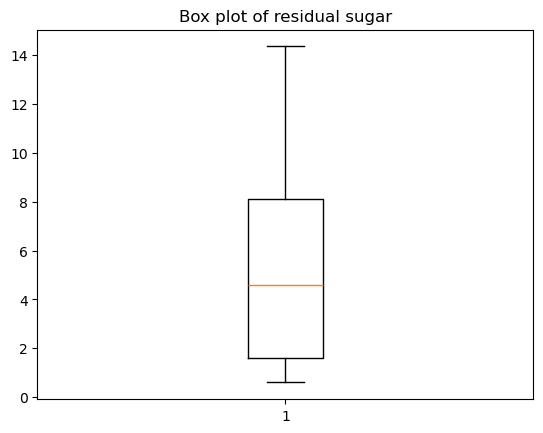

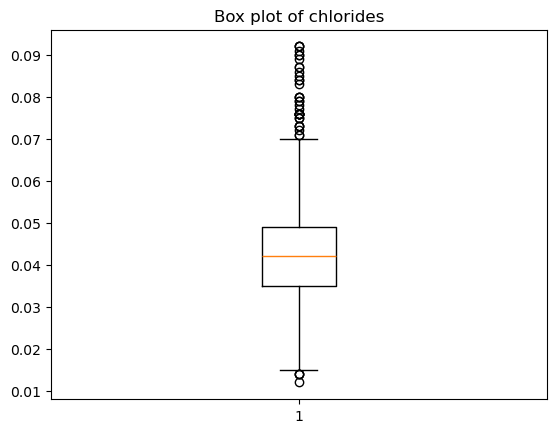

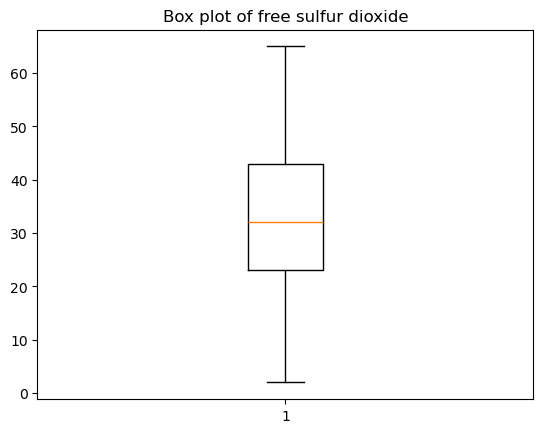

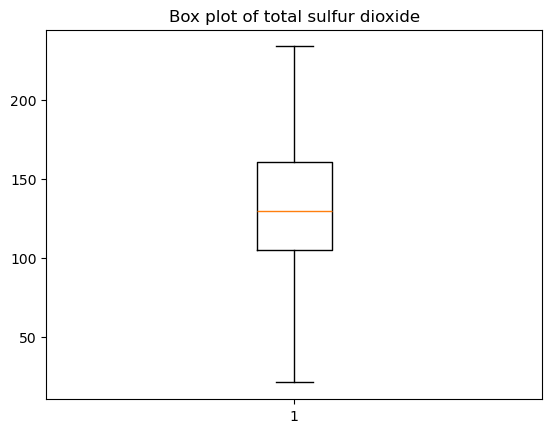

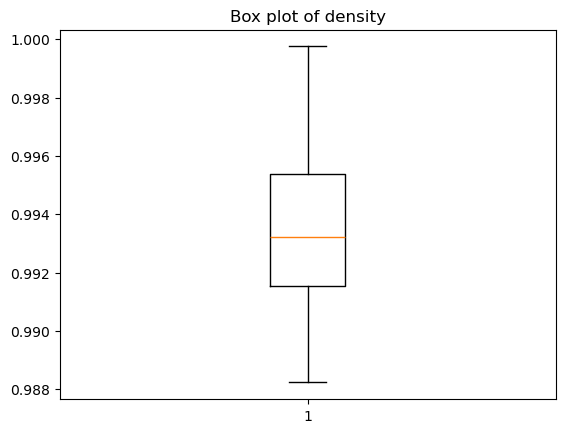

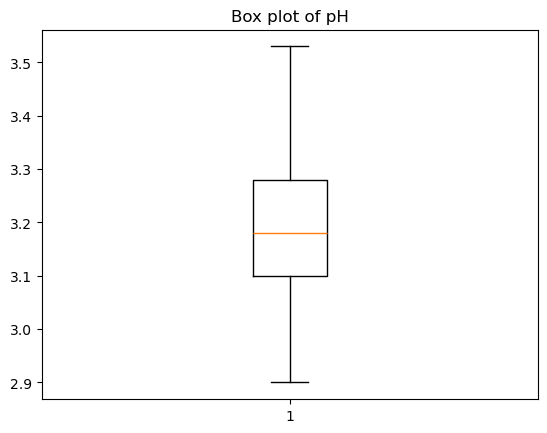

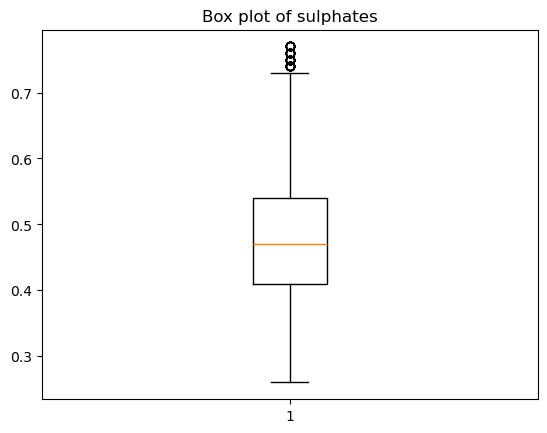

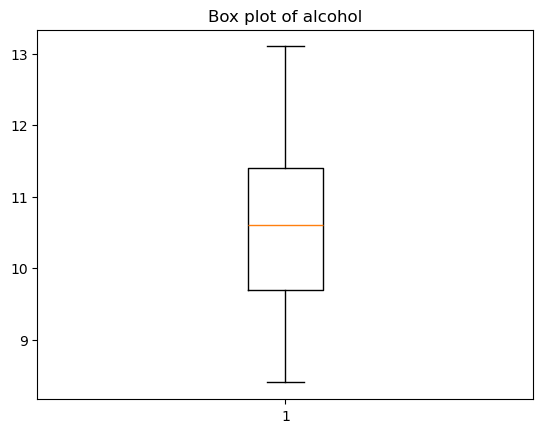

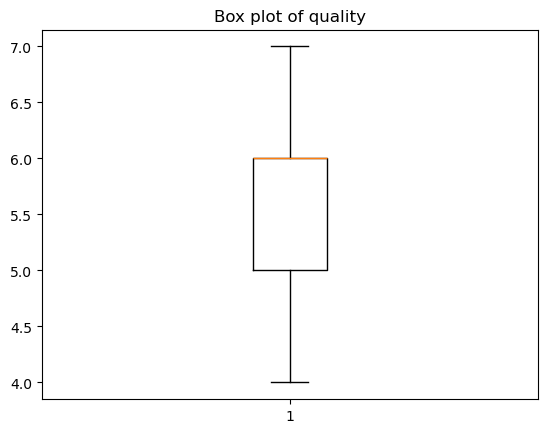

In [23]:
def drop_outliers_iqr(df, threshold=1):
    filtered_df = pd.DataFrame()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered_df[column] = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]
    return filtered_df

filtered_df = drop_outliers_iqr(df)
filtered_df = filtered_df.dropna()

display_boxplot(filtered_df)

In [24]:
features

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

In [25]:
quality_potential

'quality'

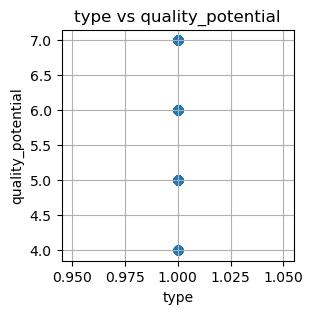

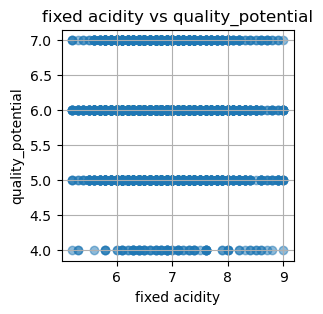

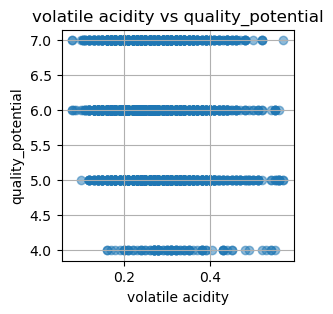

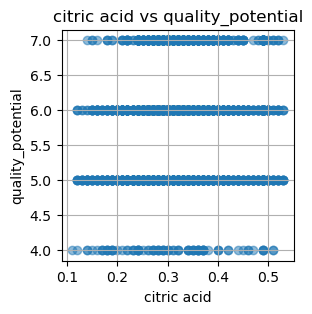

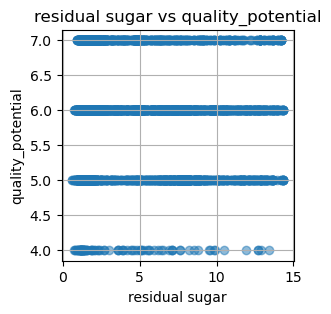

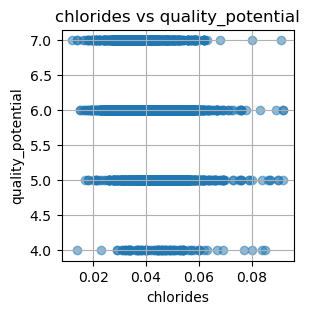

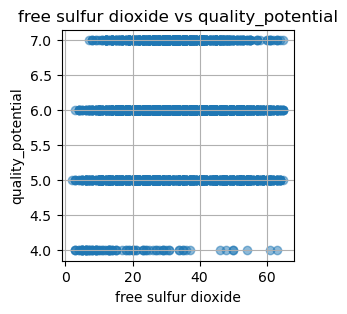

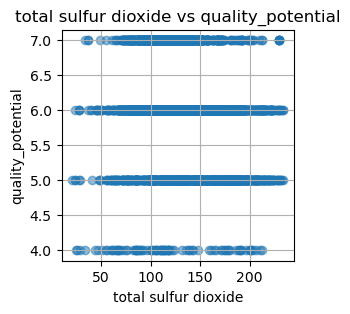

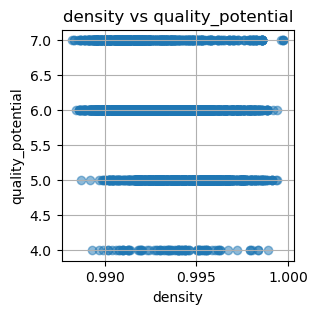

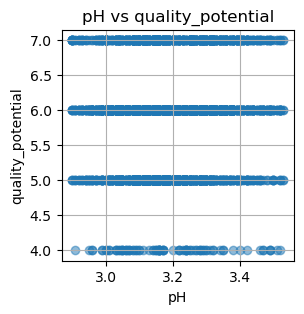

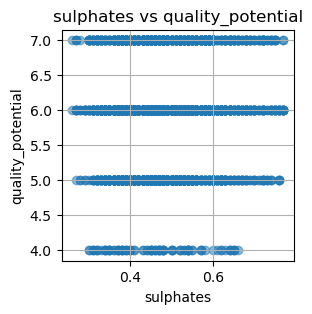

In [26]:
for feature in features:
    plt.figure(figsize=(3, 3))
    plt.scatter(filtered_df[feature], filtered_df[quality_potential], alpha=0.5)
    plt.title(f"{feature} vs quality_potential")
    plt.xlabel(feature)
    plt.ylabel("quality_potential")
    plt.grid(True)
    plt.show()
    

## Separating Feature and target

In [27]:
X = filtered_df.iloc[:, :-1].values
y = filtered_df.iloc[:, -1].values

## Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
#from catboost import CatBoostRegressor
# import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

## Standard scalling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
#%pip install catboost

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost_classifier = CatBoostClassifier(verbose=False, depth=5, learning_rate=0.1, iterations=1000, l2_leaf_reg=4, random_seed=42)
catboost_classifier.fit(X_train, y_train)

y_catboost = catboost_classifier.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_catboost)
print("CatBoost Classifier Accuracy:", accuracy_catboost)

CatBoost Classifier Accuracy: 0.6540785498489426


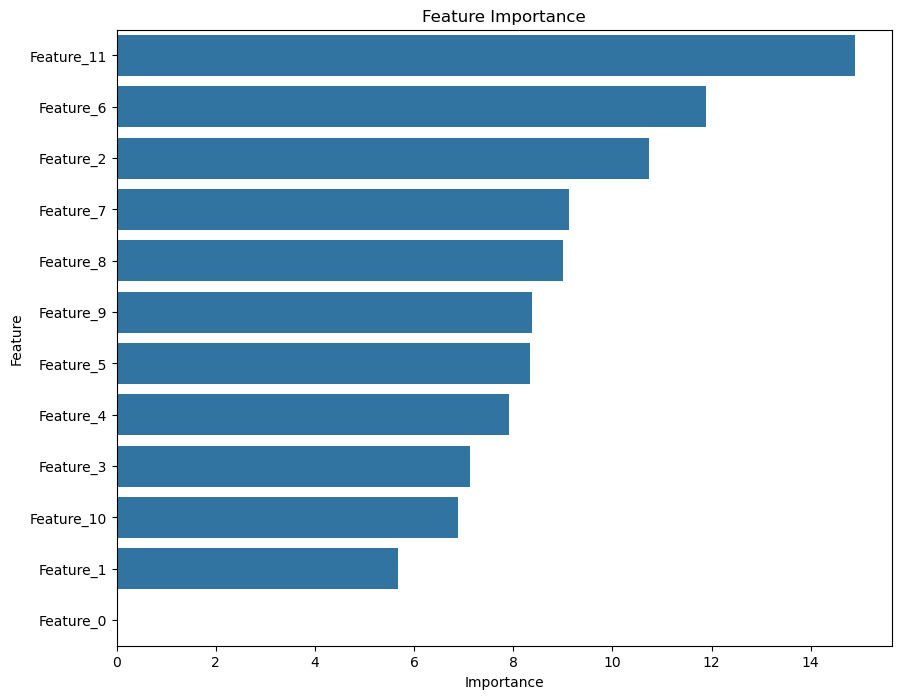

In [34]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(verbose=False)
catboost_model.fit(X, y)

feature_importance = catboost_model.get_feature_importance()
feature_names = ["Feature_" + str(i)         for i in range(len(feature_importance))]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}) 
feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending = False)

plt.figure(figsize=(10, 8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Random Forest Classifiers

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_rf)
print("RandomForestClassifier accuracy", accuracy_rf)


RandomForestClassifier accuracy 0.6993957703927492


## Extra Tree Classifiers

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

et_classifier = ExtraTreesClassifier(n_estimators=200, random_state=42)
et_classifier.fit(X_train, y_train)

y_et = et_classifier.predict(X_test)
accuracy_et = accuracy_score(y_test, y_et)
print("ExtraTreeClassifier accuracy", accuracy_et)

ExtraTreeClassifier accuracy 0.6797583081570997


## Stack Classifier

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('catboost', CatBoostClassifier(verbose=False, depth=5, learning_rate=0.1, iterations=1000, l2_leaf_reg=4, random_seed=42))
]

meta_classifier = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

stacking_classifier.fit(X_train, y_train)

y_stacking = stacking_classifier.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_stacking)
print("StackingClassifier accuracy", accuracy_stacking)

StackingClassifier accuracy 0.6978851963746223
